In [1]:
from core import *

In [2]:
import os

path = "./muestras/mosquito"
extetion = ".txt"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if extetion in file:
            files.append(r+'/'+file)

del r, d, f, file, path, extetion

files.sort()
files

['./muestras/mosquito/OR_01.txt',
 './muestras/mosquito/OR_02.txt',
 './muestras/mosquito/OR_03.txt',
 './muestras/mosquito/OR_04.txt',
 './muestras/mosquito/OR_05.txt',
 './muestras/mosquito/OR_06.txt',
 './muestras/mosquito/OR_07.txt',
 './muestras/mosquito/OR_08.txt',
 './muestras/mosquito/OR_09.txt',
 './muestras/mosquito/OR_10.txt',
 './muestras/mosquito/OR_11.txt',
 './muestras/mosquito/OR_12.txt',
 './muestras/mosquito/OR_13.txt',
 './muestras/mosquito/OR_14.txt',
 './muestras/mosquito/OR_15.txt',
 './muestras/mosquito/OR_16.txt']

In [3]:
# We pick a random file to test the class

from random import randint

ind = randint(0,len(files)-1)
print(ind)
file = files[ind]

raman = RamanSpectrum(file)


7


In [4]:
raman.metadata['Acquired']

'03.07.2023 13:38:08'

In [5]:
raman.interactive(mod=True, method='poly_fit')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

In [6]:
print('PATH             ', 'ACQUIRED', sep='\t')
print('----             ', '--------', sep='\t')

ramanspecs = {}

for f in files:
    r = RamanSpectrum(f)
    ramanspecs[r.acquired.split('_')[1]] = r
    print(r.filepath, r.acquired, sep='\t')

del r, f

PATH             	ACQUIRED
----             	--------
./muestras/mosquito/OR_01.txt	03072023_13:21:19
./muestras/mosquito/OR_02.txt	03072023_13:27:24
./muestras/mosquito/OR_03.txt	03072023_13:29:37
./muestras/mosquito/OR_04.txt	03072023_13:31:24
./muestras/mosquito/OR_05.txt	03072023_13:33:22
./muestras/mosquito/OR_06.txt	03072023_13:35:01
./muestras/mosquito/OR_07.txt	03072023_13:36:36
./muestras/mosquito/OR_08.txt	03072023_13:38:08
./muestras/mosquito/OR_09.txt	03072023_13:41:30
./muestras/mosquito/OR_10.txt	03072023_13:43:06
./muestras/mosquito/OR_11.txt	03072023_13:44:31
./muestras/mosquito/OR_12.txt	03072023_13:45:56
./muestras/mosquito/OR_13.txt	03072023_13:47:25
./muestras/mosquito/OR_14.txt	03072023_13:49:07
./muestras/mosquito/OR_15.txt	03072023_13:50:37
./muestras/mosquito/OR_16.txt	03072023_13:52:27


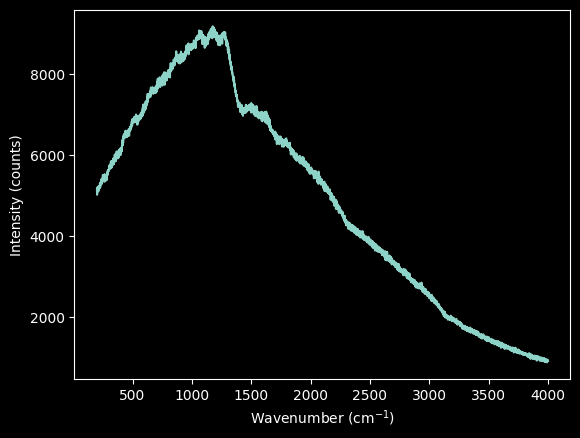

<Figure size 640x480 with 0 Axes>

In [7]:
plotraman = lambda x: ramanspecs[x].plot()
plotraman('13:27:24')

borrardeldic = lambda keey: ramanspecs.pop(keey)
borrardeldic('13:27:24')

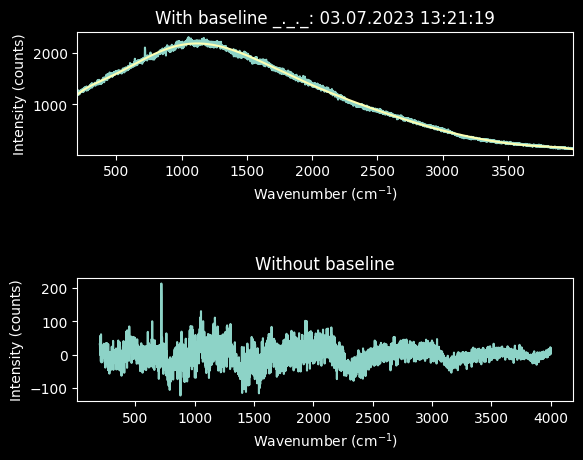

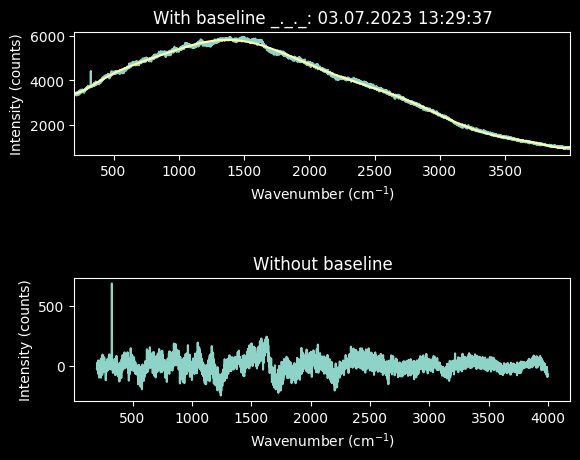

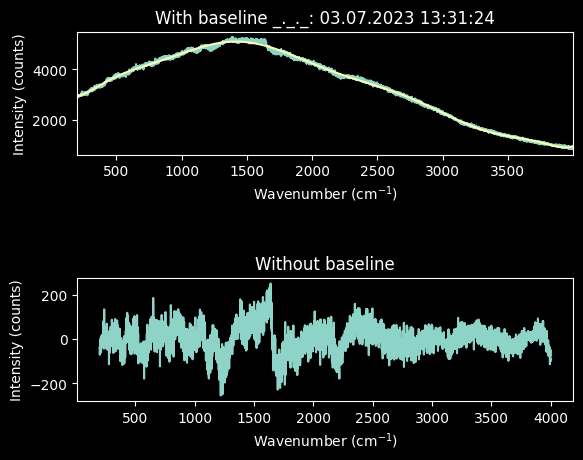

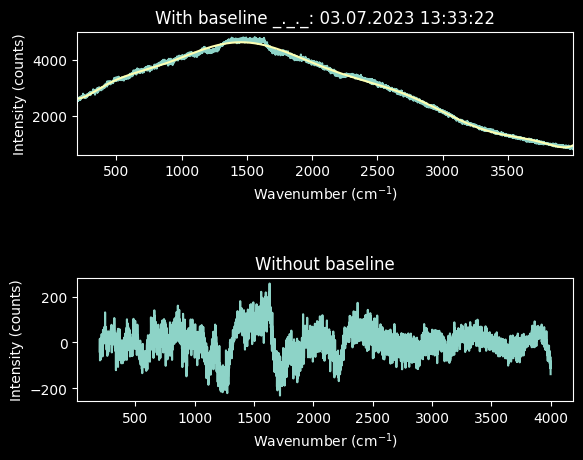

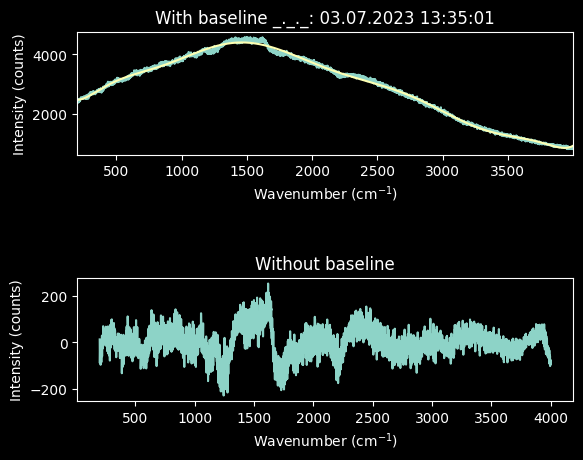

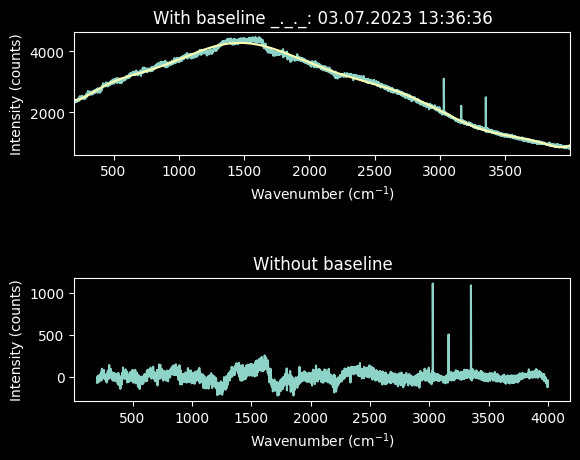

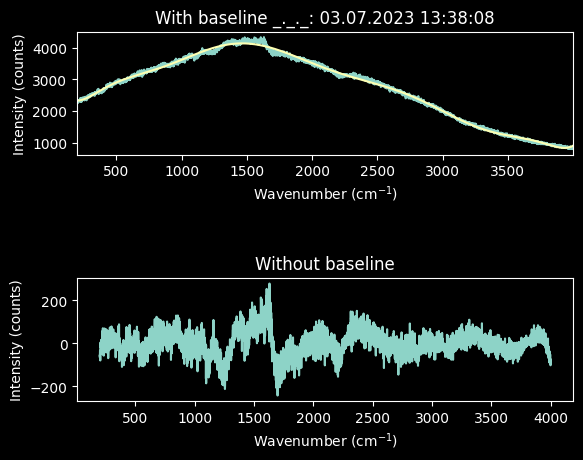

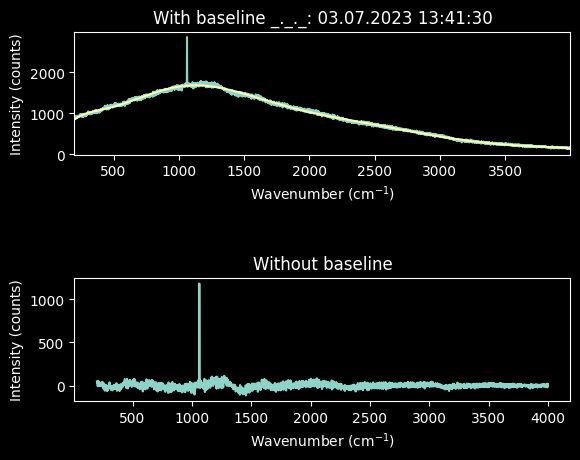

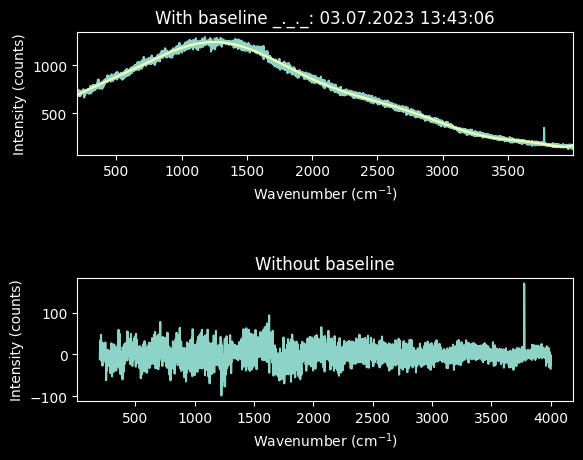

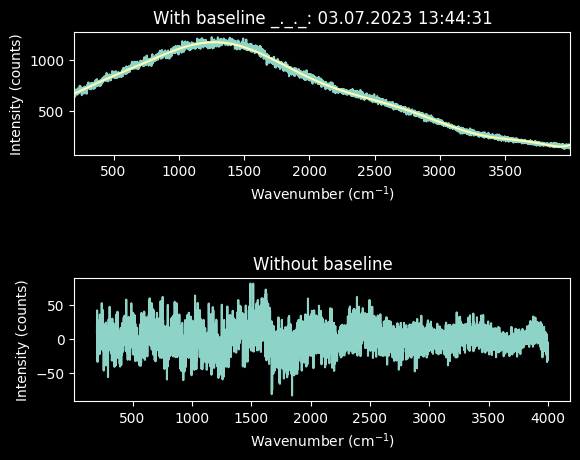

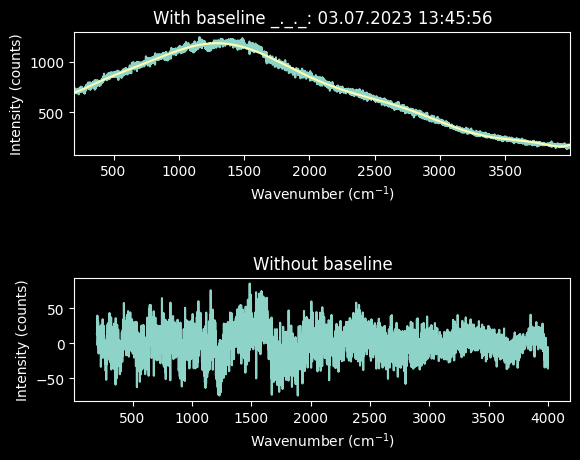

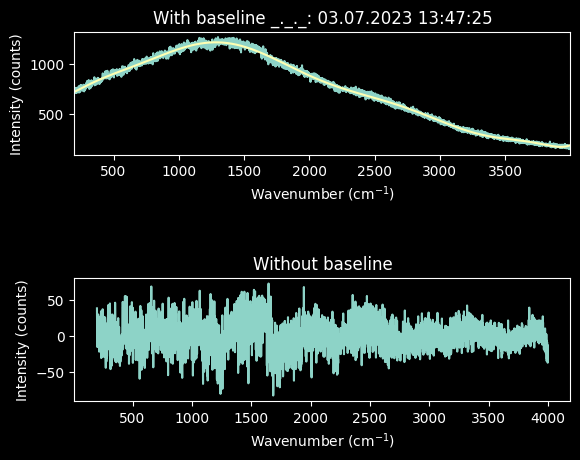

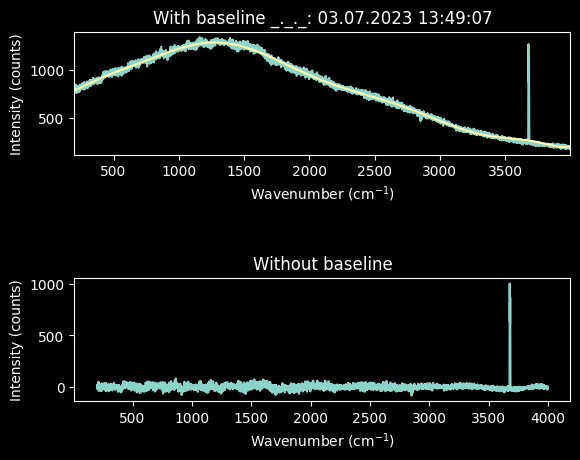

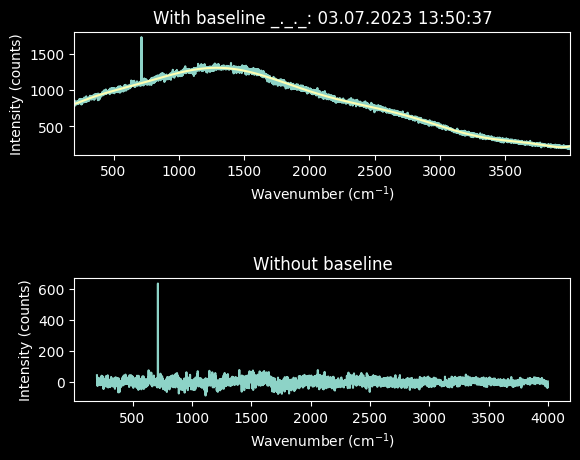

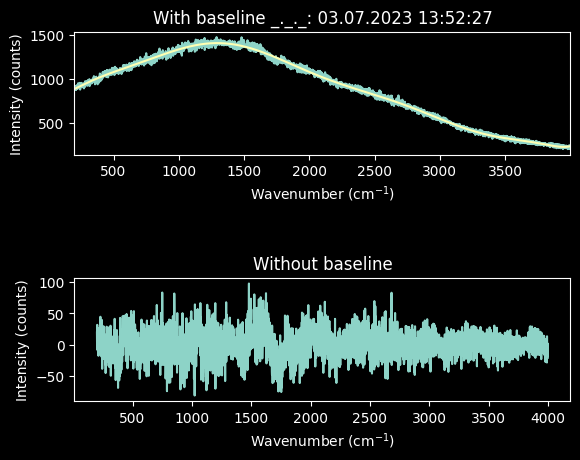

In [8]:
# Iterating over all the values in the dictionary

for k, v in ramanspecs.items():
    v.polyfit(4000,200,mod='raw',ord=10)

In [9]:
5+5

10

In [10]:
interactraman = lambda x: ramanspecs[x].interactive(x=ramanspecs[x].polylx, y=ramanspecs[x].polyly ,mod=True, method='sav_gol')
interactraman('13:52:27')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

TypeError: RamanSpectrum.plotnsave() got an unexpected keyword argument 'show'

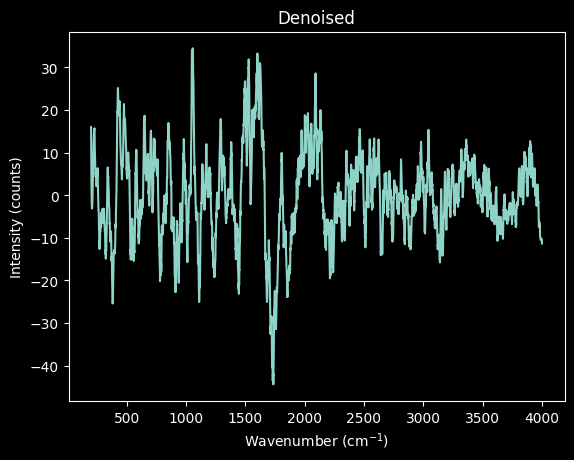

In [12]:
savgolraman = lambda x: ramanspecs[x].sav_gol(ramanspecs[x].polylx,ramanspecs[x].polyly,window=44,order=4,from_args=True)
savgolraman('13:52:27')

for k, v in ramanspecs.items():
    savgolraman(k)

In [ ]:
getrspec = lambda keey: ramanspecs[keey]
getrspec('13:27:24').interactive(mod=True, method='poly_fit')

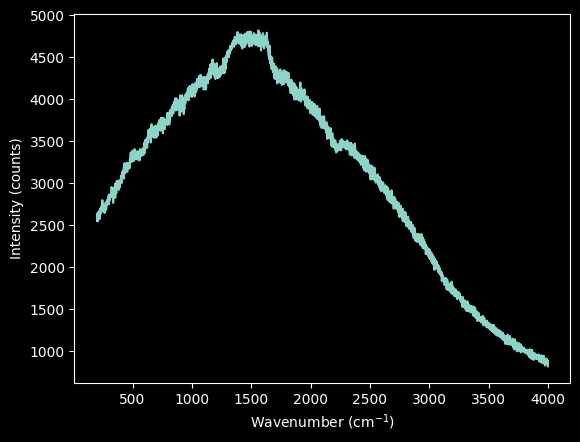

<Figure size 640x480 with 0 Axes>

In [12]:
ploti = lambda keey: ramanspecs[keey].plot()
ploti('13:33:22')

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit the peaks
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))


# Define initial parameter guesses for fitting
initial_guess = [14000, 1000, 100, 2500, 1300, 1200, 1000, 1500, 100]

# Define the function to fit the entire spectrum
def fit_function(x, *params):
    num_peaks = len(params) // 3
    result = np.zeros_like(x)
    for i in range(num_peaks):
        result += gaussian(x, params[i * 3], params[i * 3 + 1], params[i * 3 + 2])
    return result

# Perform curve fitting
# The * before initial_guess is to unpack the list
# The ** before test is to unpack the dictionary

# params, _ = curve_fit(fit_function, test.x, test.y, p0=initial_guess)

# # Extract individual peak parameters
# num_peaks = len(params) // 3
# peak_params = []

# for i in range(num_peaks):
#     peak_params.append((params[i * 3], params[i * 3 + 1], params[i * 3 + 2]))

# # Print the peak parameters
# for i, (amplitude, mean, stddev) in enumerate(peak_params):
#     print(f"Peak {i+1}: Amplitude={amplitude}, Mean={mean}, Stddev={stddev}")

# # Plot the original spectrum and the fitted curve
# plt.figure(figsize=(8, 6))
# plt.plot(test.x, test.y, label='Original Spectrum')
# plt.plot(test.x, fit_function(test.x, *params), label='Fitted Curve')


# plt.xlabel('X')
# plt.ylabel('Intensity')
# plt.legend()
# plt.show()


./muestras/tallo/1/Organic_01.txt failed to fit ./muestras/tallo/1/Organic_01.txt
./muestras/tallo/1/Organic_02.txt failed to fit ./muestras/tallo/1/Organic_02.txt
Peak 1: Amplitude=9801.379702876593, Mean=1053.3229637131612, Stddev=210.5838468632487
Peak 2: Amplitude=4307.016701348418, Mean=1376.3203443692005, Stddev=863.0916872108447
Peak 3: Amplitude=1176.3999005249707, Mean=9.713681898943287, Stddev=-304.3337087941013


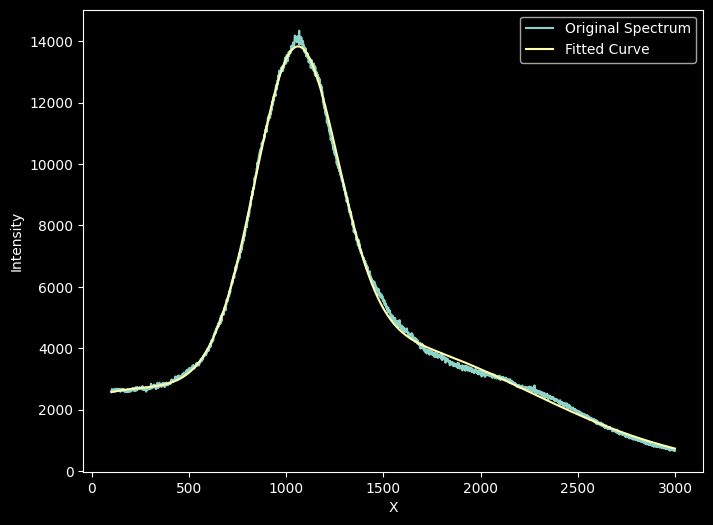

Peak 1: Amplitude=7901.881806089807, Mean=1034.9025410618751, Stddev=187.5304084784164
Peak 2: Amplitude=4030.760076479966, Mean=1253.209315224641, Stddev=960.8320355943437
Peak 3: Amplitude=1425.2166994916881, Mean=1293.6289747438677, Stddev=194.5601086269355


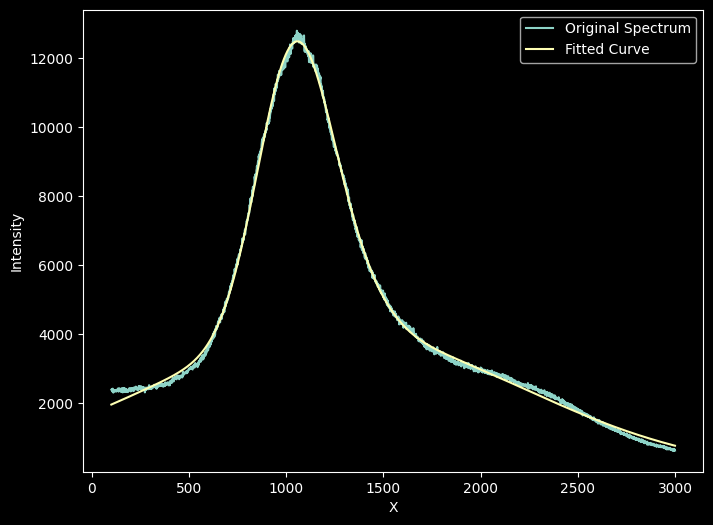

Peak 1: Amplitude=7761.7522512037785, Mean=1051.5024891845626, Stddev=193.90189894951712
Peak 2: Amplitude=3749.3467656528, Mean=1258.9786375143926, Stddev=962.4143978759876
Peak 3: Amplitude=724.5228900051818, Mean=1401.7898775293322, Stddev=165.2637328773393


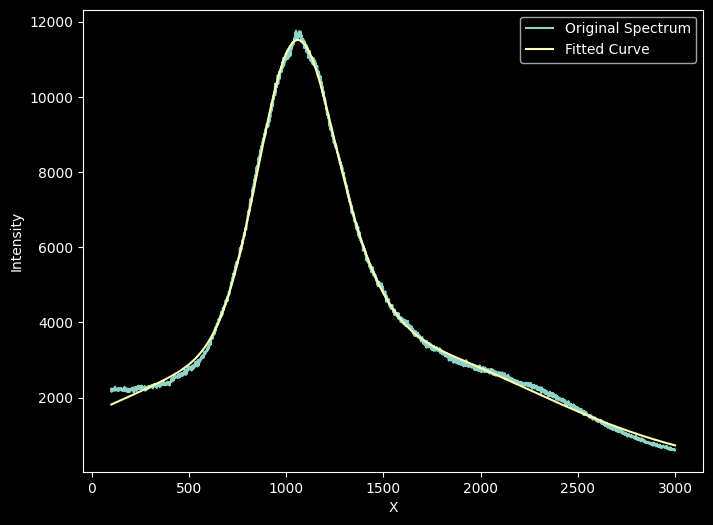

Peak 1: Amplitude=7010.277378982546, Mean=1046.5044047600888, Stddev=191.9312401868985
Peak 2: Amplitude=3509.7016149110464, Mean=1259.7792953961855, Stddev=967.1855206294869
Peak 3: Amplitude=887.2165625266555, Mean=1356.5254522573248, Stddev=184.38609551710732


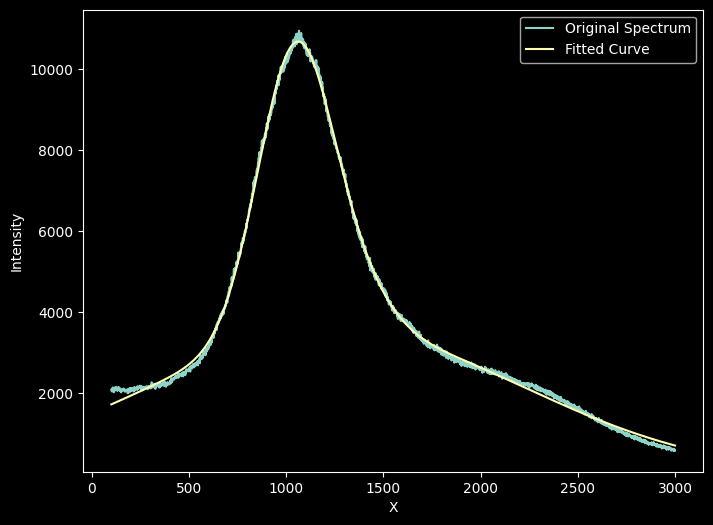

Peak 1: Amplitude=650.2526903883245, Mean=1413.3530401915539, Stddev=164.91601089684195
Peak 2: Amplitude=3336.784918040798, Mean=1261.926932755778, Stddev=969.5260762777999
Peak 3: Amplitude=6705.424835415922, Mean=1054.6207014891393, Stddev=194.90791182428902


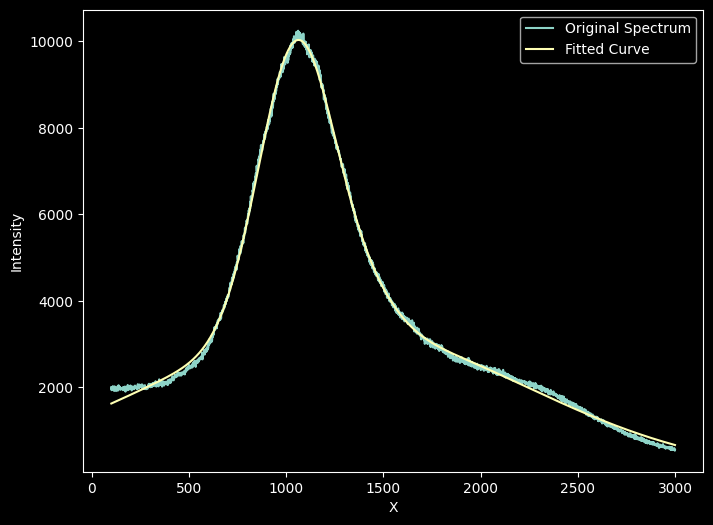

Peak 1: Amplitude=456.5723828837288, Mean=1468.1629533061885, Stddev=142.74108160663022
Peak 2: Amplitude=3165.6497083597096, Mean=1266.168305644592, Stddev=970.3630488785114
Peak 3: Amplitude=6345.615237135241, Mean=1062.6357812181254, Stddev=199.20423544760467


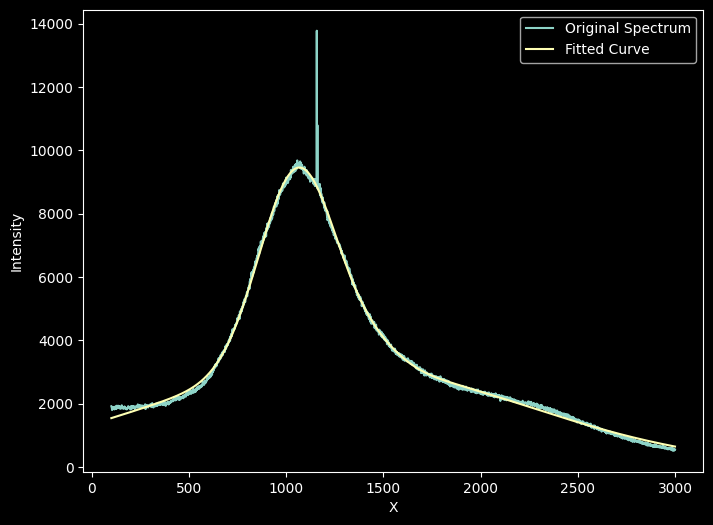

Peak 1: Amplitude=566.1148031841395, Mean=1428.3371848876325, Stddev=161.56970768325462
Peak 2: Amplitude=3034.9683604156035, Mean=1259.3451098241017, Stddev=974.5187313113489
Peak 3: Amplitude=5866.872750155757, Mean=1058.4445969415278, Stddev=196.12292417324758


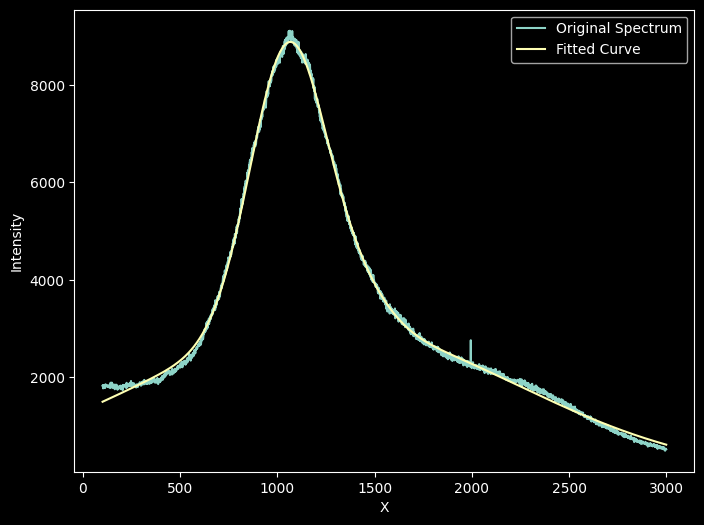

Peak 1: Amplitude=5536.552770526417, Mean=1062.4999701027505, Stddev=197.4666502689624
Peak 2: Amplitude=2901.853178813282, Mean=1257.1793612620334, Stddev=978.3946208701655
Peak 3: Amplitude=488.98764435863524, Mean=1450.3170902027543, Stddev=156.31242590361154


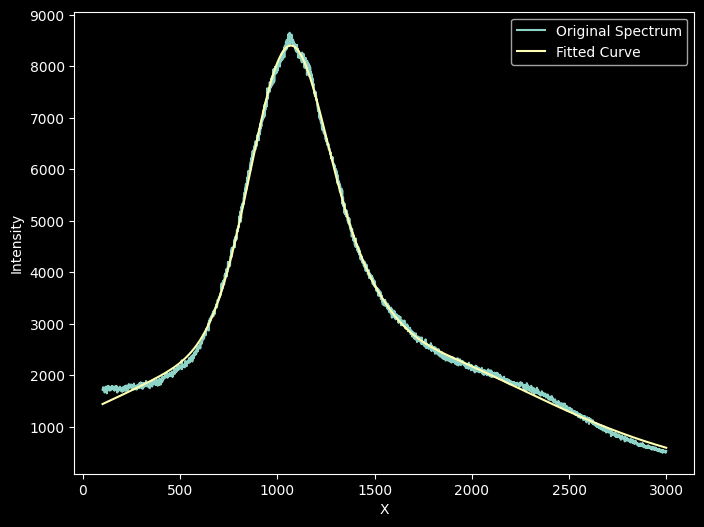

Peak 1: Amplitude=5155.5445734829045, Mean=1065.111181712159, Stddev=197.7032964724369
Peak 2: Amplitude=2801.417360374103, Mean=1243.6575490808136, Stddev=981.1744686444231
Peak 3: Amplitude=454.84808570205735, Mean=1462.5317853262304, Stddev=152.56599471810483


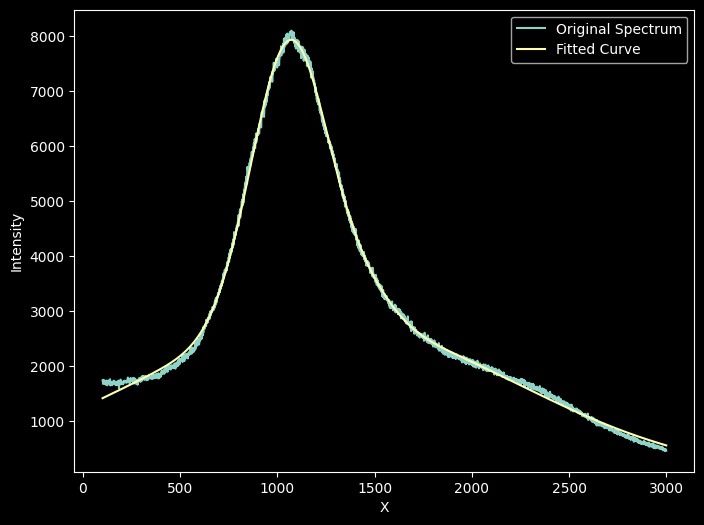

Peak 1: Amplitude=466.6296776750488, Mean=1453.3109048226697, Stddev=161.4354627218875
Peak 2: Amplitude=2647.25057257102, Mean=1243.9886787454604, Stddev=990.2751300144168
Peak 3: Amplitude=4785.731190284737, Mean=1065.3556596665508, Stddev=-196.9961682605765


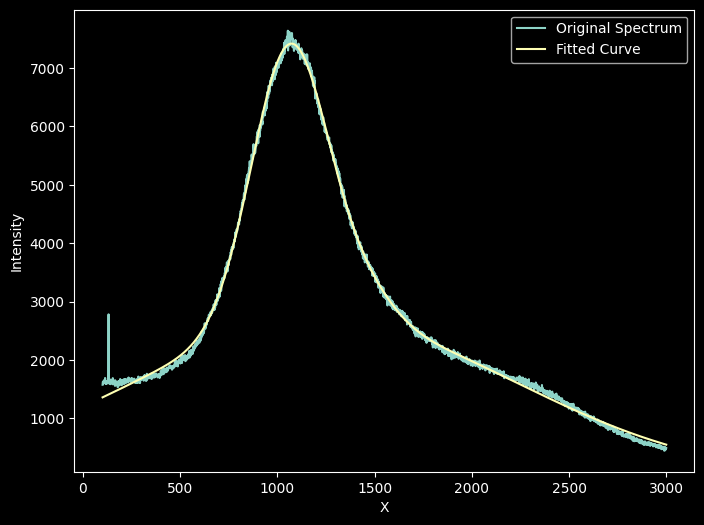

./muestras/tallo/1/Organic_13.txt failed to fit ./muestras/tallo/1/Organic_13.txt
Peak 1: Amplitude=4215.1675685816035, Mean=1064.600544387539, Stddev=195.03894174509875
Peak 2: Amplitude=2468.1385284912753, Mean=1237.1310377007208, Stddev=994.2192361165585
Peak 3: Amplitude=502.1623159175532, Mean=1429.591004424683, Stddev=176.29526919325167


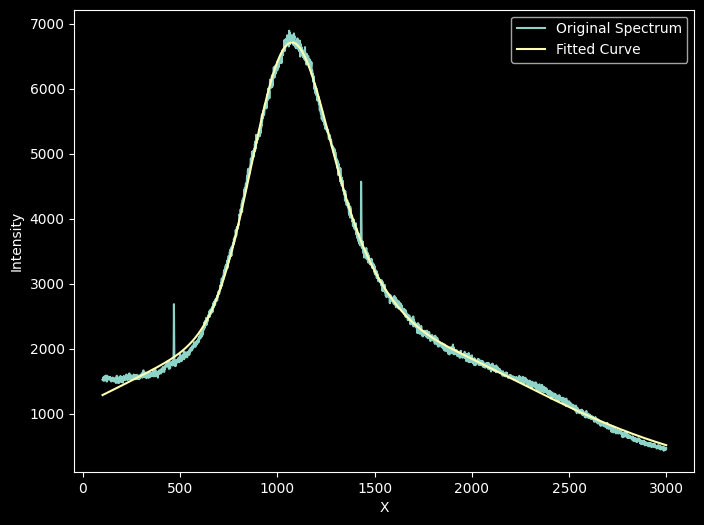

Peak 1: Amplitude=4035.6548760987016, Mean=1071.2266443380715, Stddev=197.92767974356613
Peak 2: Amplitude=2382.9461211630437, Mean=1231.348656015591, Stddev=999.6107436380628
Peak 3: Amplitude=397.7753400462738, Mean=1464.507423676586, Stddev=164.25869920255812


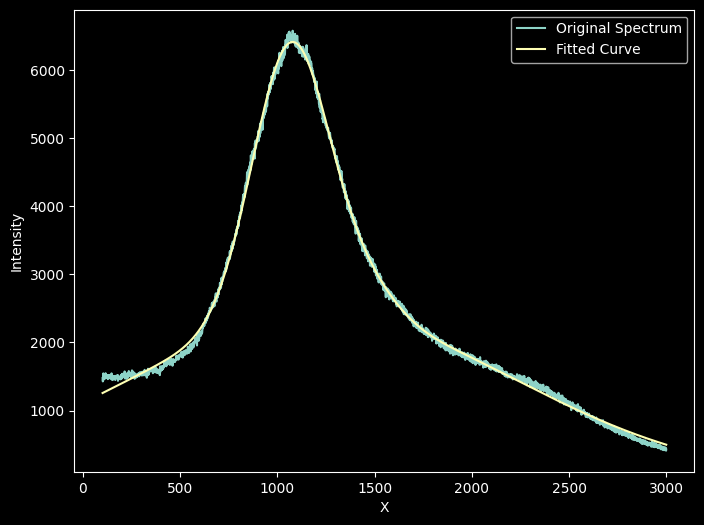

Peak 1: Amplitude=3845.4288726562054, Mean=1073.3289675533547, Stddev=198.21439147331336
Peak 2: Amplitude=2306.0521008692876, Mean=1226.0929806693032, Stddev=1004.6819910022838
Peak 3: Amplitude=372.351321937948, Mean=1479.5050677302104, Stddev=159.14924269706418


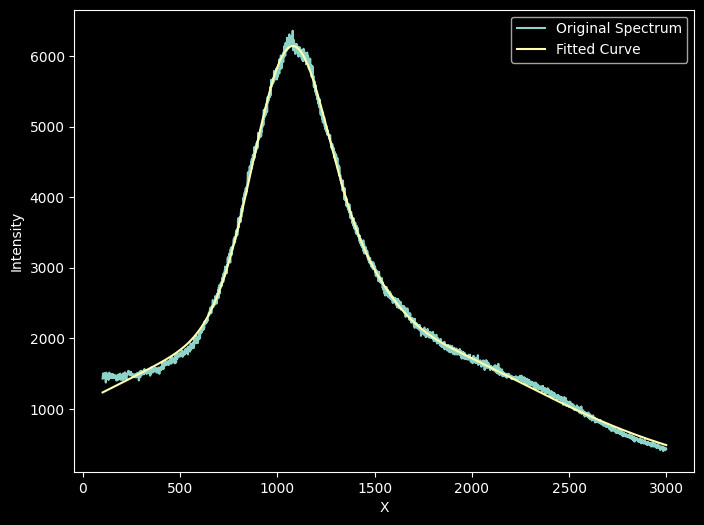

./muestras/tallo/1/Organic_17.txt failed to fit ./muestras/tallo/1/Organic_17.txt
Peak 1: Amplitude=3468.6585139275185, Mean=1077.4015474455568, Stddev=198.36252477729144
Peak 2: Amplitude=2175.6434895700722, Mean=1218.0382225417402, Stddev=1010.084409981447
Peak 3: Amplitude=328.5151090816749, Mean=1487.4875689788962, Stddev=153.63383201619706


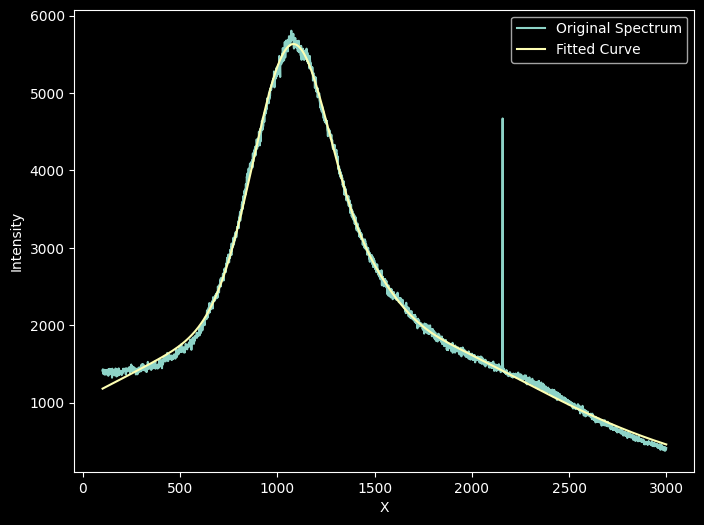

Peak 1: Amplitude=3310.611270913774, Mean=1080.092116237444, Stddev=198.96195846895648
Peak 2: Amplitude=2095.20676103107, Mean=1206.4022220925788, Stddev=1022.0434905901548
Peak 3: Amplitude=313.63820409772904, Mean=1503.191123055469, Stddev=152.91473105728195


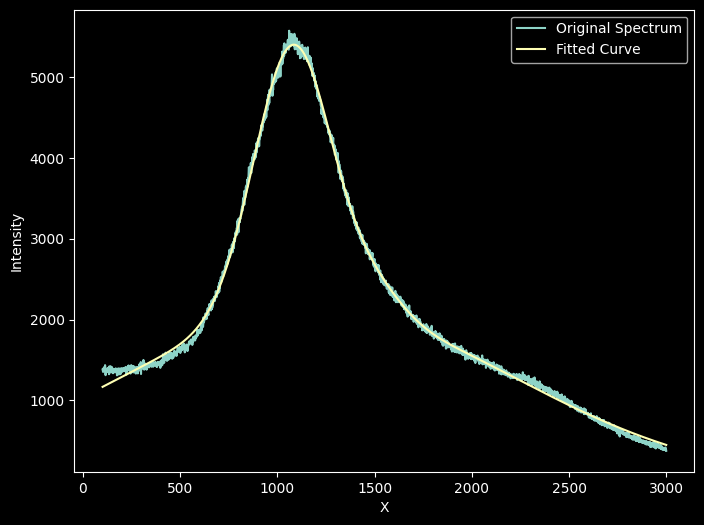

Peak 1: Amplitude=3176.445995359987, Mean=1081.916286117466, Stddev=198.5984074886085
Peak 2: Amplitude=2100.1523639013326, Mean=1174.841932239402, Stddev=1024.0991486856603
Peak 3: Amplitude=271.87349709745314, Mean=1520.856558221722, Stddev=141.66982197673804


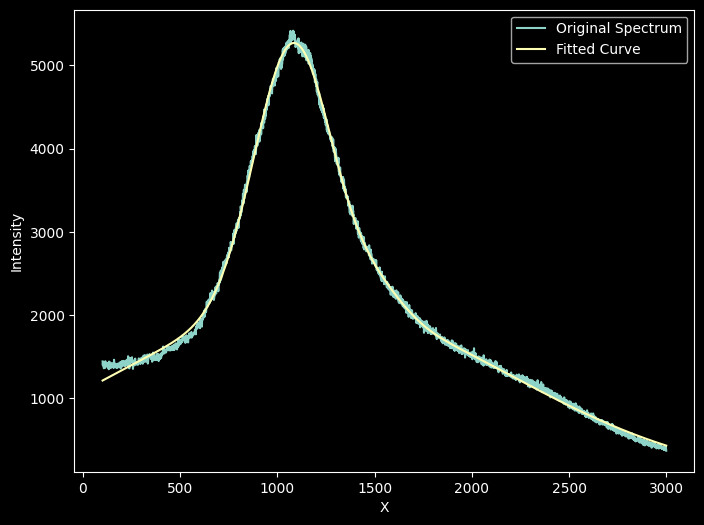

In [36]:
dic = {}
for f in files:
    r = RamanSpectrum(f)
    if r.y[0] < 30000:
        try:
            params, _ = curve_fit(fit_function, r.x, r.y, p0=initial_guess)
            # Extract individual peak parameters
            num_peaks = len(params) // 3
            peak_params = []

            for i in range(num_peaks):
                peak_params.append((params[i * 3], params[i * 3 + 1], params[i * 3 + 2]))

            # Print the peak parameters
            for i, (amplitude, mean, stddev) in enumerate(peak_params):
                print(f"Peak {i+1}: Amplitude={amplitude}, Mean={mean}, Stddev={stddev}")

            # Plot the original spectrum and the fitted curve
            plt.figure(figsize=(8, 6))
            plt.plot(r.x, r.y, label='Original Spectrum')
            plt.plot(r.x, fit_function(r.x, *params), label='Fitted Curve')
            plt.xlabel('X')
            plt.ylabel('Intensity')
            plt.legend()
            plt.show()
            dic[f] = [r.x, r.y, fit_function(r.x, *params)]
        except:
            print(f, "failed to fit", f)


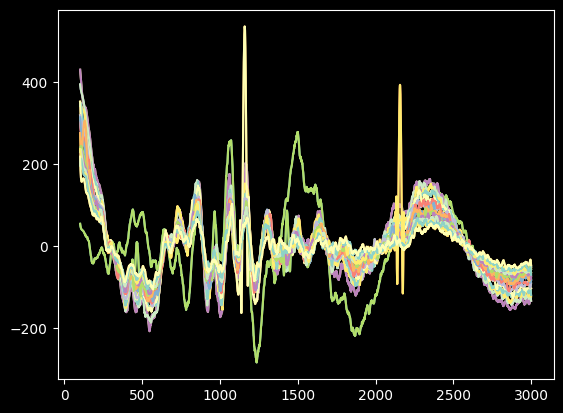

In [45]:
# Each value of the dic is a list, we will plot l[0] vs the normalized savgol_filter((l[1] - l[2]), 30, 3)
# Path: core.ipynb
for k, l in dic.items():
    plt.plot(l[0], savgol_filter((l[1] - l[2]), 50, 5))

# Now we create a video of the plots
# Path: core.ipynb
import cv2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 1, (640, 480))

for k, l in dic.items():
    plt.plot(l[0], savgol_filter((l[1] - l[2]), 50, 5))
    plt.savefig('temp.png')
    img = cv2.imread('temp.png')
    out.write(img)

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

    

In [6]:
print('PATH             ', 'ACQUIRED', sep='\t')
print('----             ', '--------', sep='\t')

ramanspecs = {}

for f in files:
    r = RamanSpectrum(f)
    ramanspecs[r.acquired.split('_')[1]] = r
    print(r.filepath, r.acquired, sep='\t')

del r, f

PATH             	ACQUIRED
----             	--------
./muestras/mosquito/OR_01.txt	03072023_13:21:19
./muestras/mosquito/OR_02.txt	03072023_13:27:24
./muestras/mosquito/OR_03.txt	03072023_13:29:37
./muestras/mosquito/OR_04.txt	03072023_13:31:24
./muestras/mosquito/OR_05.txt	03072023_13:33:22
./muestras/mosquito/OR_06.txt	03072023_13:35:01
./muestras/mosquito/OR_07.txt	03072023_13:36:36
./muestras/mosquito/OR_08.txt	03072023_13:38:08
./muestras/mosquito/OR_09.txt	03072023_13:41:30
./muestras/mosquito/OR_10.txt	03072023_13:43:06
./muestras/mosquito/OR_11.txt	03072023_13:44:31
./muestras/mosquito/OR_12.txt	03072023_13:45:56
./muestras/mosquito/OR_13.txt	03072023_13:47:25
./muestras/mosquito/OR_14.txt	03072023_13:49:07
./muestras/mosquito/OR_15.txt	03072023_13:50:37
./muestras/mosquito/OR_16.txt	03072023_13:52:27


In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

def fit_raman(raman):
    # Generate some sample data
    x_ = raman.x
    y_ = raman.y

    # Fit the data to the Gaussian function
    popt, pcov = curve_fit(gaussian, x_, y_, p0=[100, 100, 100])

    # Retrieve the optimized parameters
    amplitude, mean, stddev = popt

    y_fit = gaussian(x_, amplitude, mean, stddev)
    y_new = y_ - y_fit

    # Plot the original data and the fitted curve
    plt.plot(x_, y_new - min(y_new) , 'r-', color='cyan',label='Data')
    # plt.plot(xf, y_fit,color='red', label='Fit')
    raman.setprops(x_, 'x_b')
    raman.setprops(y_new - min(y_new), 'y_b')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(raman.acquired)
    plt.show()
    return x_, y_new - min(y_new)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(x, y, threshold=3):
    # Calculate the mean and standard deviation
    x_mean, y_mean = np.mean(x), np.mean(y)
    x_std, y_std = np.std(x), np.std(y)

    # Compute the Z-scores for each point
    x_z_scores = np.abs((x - x_mean) / x_std)
    y_z_scores = np.abs((y - y_mean) / y_std)

    # Find the indices of points with Z-scores greater than the threshold
    outlier_indices = np.where((x_z_scores > threshold) | (y_z_scores > threshold))[0]

    # Remove the outliers
    x_filtered = np.delete(x, outlier_indices)
    y_filtered = np.delete(y, outlier_indices)

    return x_filtered, y_filtered


# Detect and remove outliers

def plot_removed(r,t_):
    x_filtered, y_filtered = remove_outliers(r.props['x_b'], r.props['y_b'], threshold=t_)
    r.setprops(x_filtered, 'x_filtered')
    r.setprops(y_filtered, 'y_filtered')

    # Plotting before and after removing outliers
    plt.figure(figsize=(10, 4))

    xinitial = r.props['x_b']
    yinitial = r.props['y_b']

    plt.subplot(1, 2, 1)
    plt.plot(xinitial, yinitial)
    plt.title('Before Removing Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.subplot(1, 2, 2)
    plt.plot(x_filtered, y_filtered)
    plt.title('After Removing Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.tight_layout()
    plt.show()

In [10]:
ramanspecs.pop('12:03:20')
ramanspecs.pop('12:10:13')

In [11]:
for e in ramanspecs.keys():
    print(e)

11:49:04
11:50:00
11:52:10
11:53:08
11:54:33
11:55:34
11:56:20
11:57:19
11:58:14
11:59:11
12:04:10
12:05:00
12:06:11
12:07:11


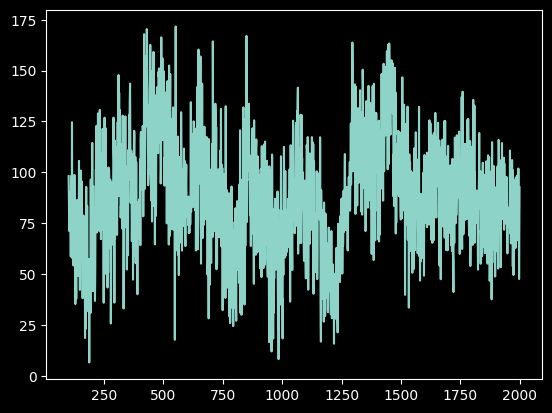

In [12]:
test = ramanspecs['12:07:11']
plt.plot(test.props['x_filtered'], test.props['y_filtered'])

In [15]:
from scipy.signal import savgol_filter

def plot_savinormalized(raman_object): 
    u = raman_object.props['x_filtered']
    v = raman_object.props['y_filtered']
    vhat = savgol_filter(v, 51, 3) # window size 51, polynomial order 3
    # Ploting the data with h and w as width and height respectively
    h = 5
    w = 20

    ########################################

    # Find the maximum y-value
    max_y = np.max(vhat)

    # Normalize the y-values
    normalized_y = np.divide(vhat, max_y)

    ########################################

    plt.figure(figsize=(w, h))
    plt.title(raman_object.acquired)
    plt.plot(u, normalized_y, color='red')
    raman_object.setprops(u, 'x_proposed')
    raman_object.setprops(normalized_y, 'y_proposed')
    plt.savefig('./vid50/{}.png'.format(raman_object.acquired))


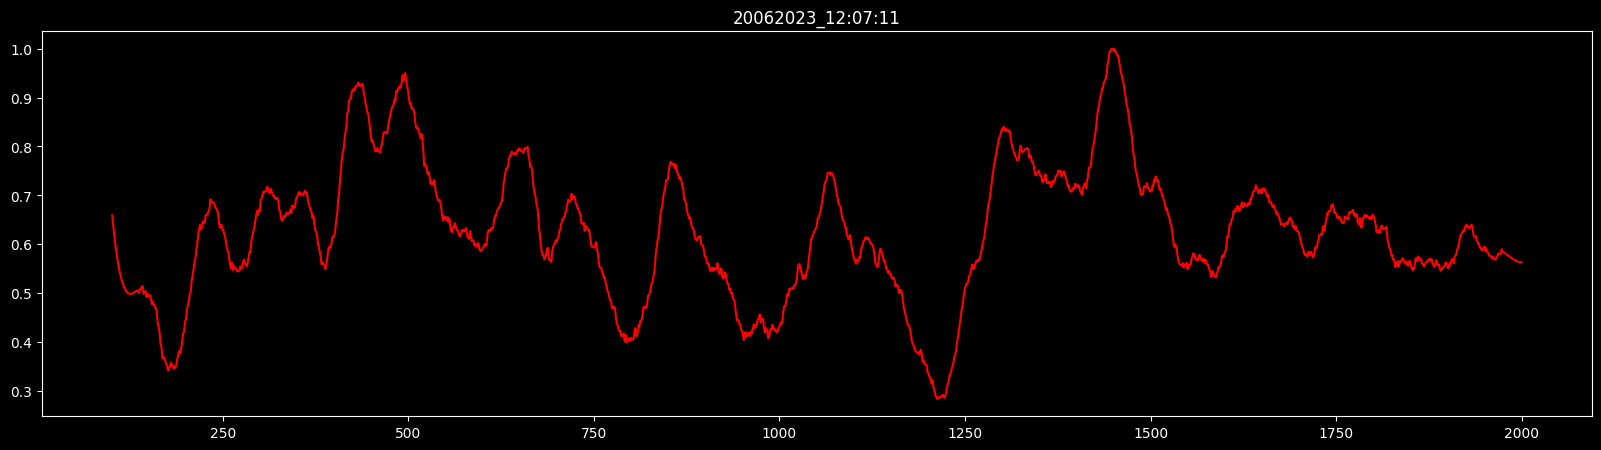

In [16]:
plot_savinormalized(test)

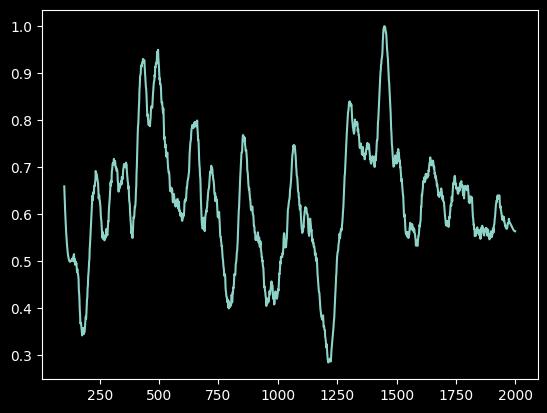

In [17]:
plt.plot(test.props['x_proposed'], test.props['y_proposed'])

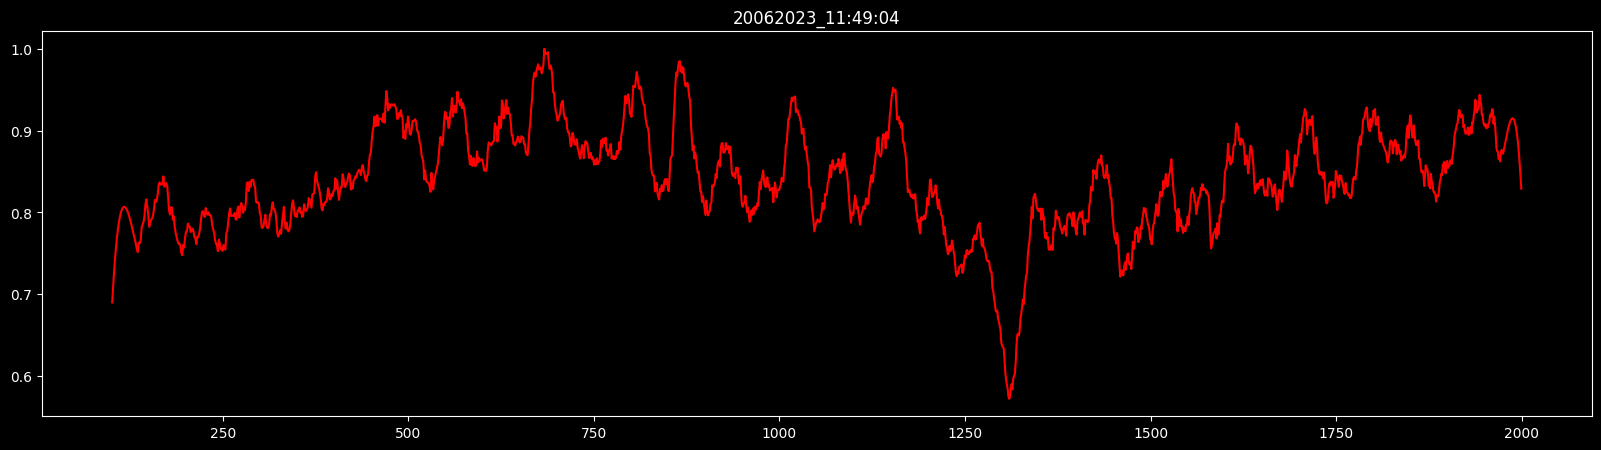

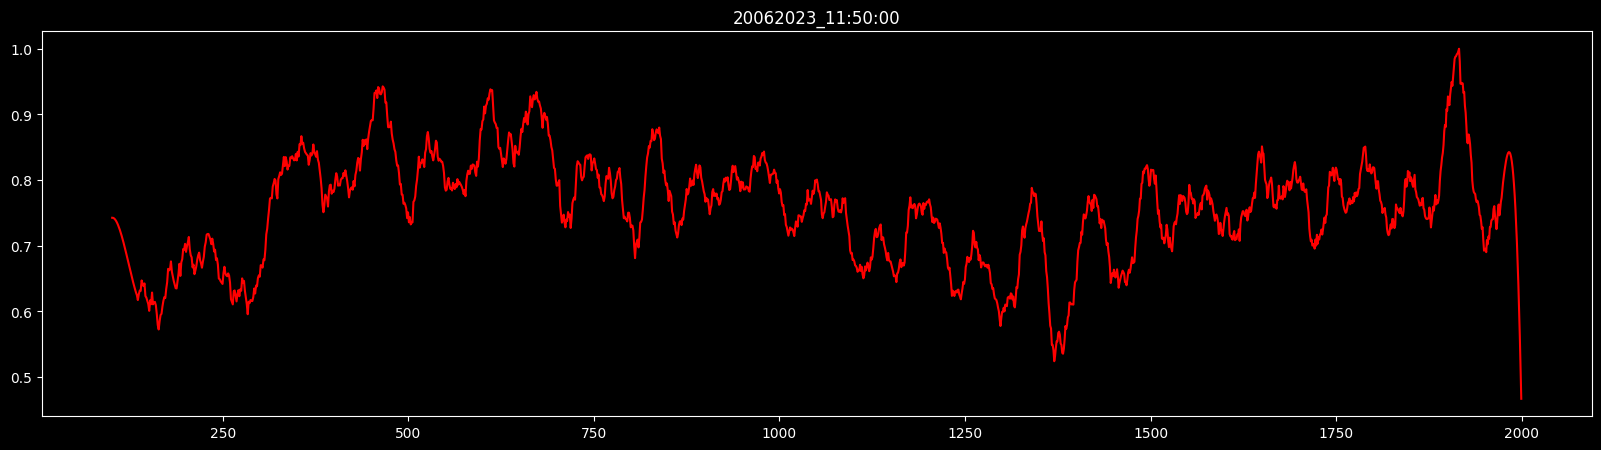

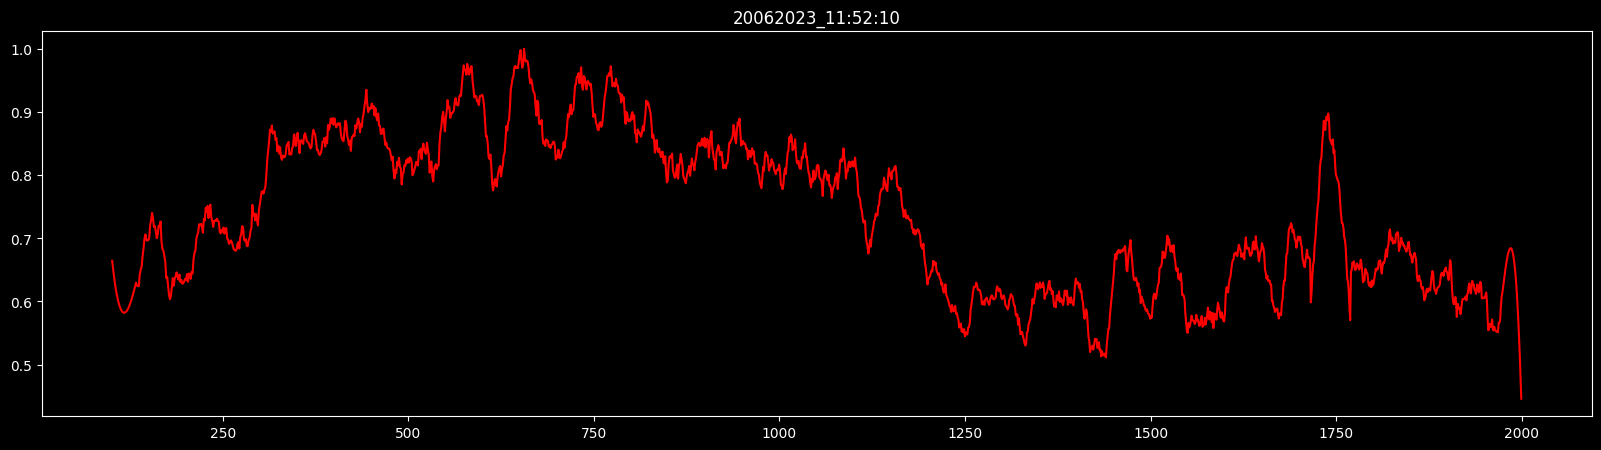

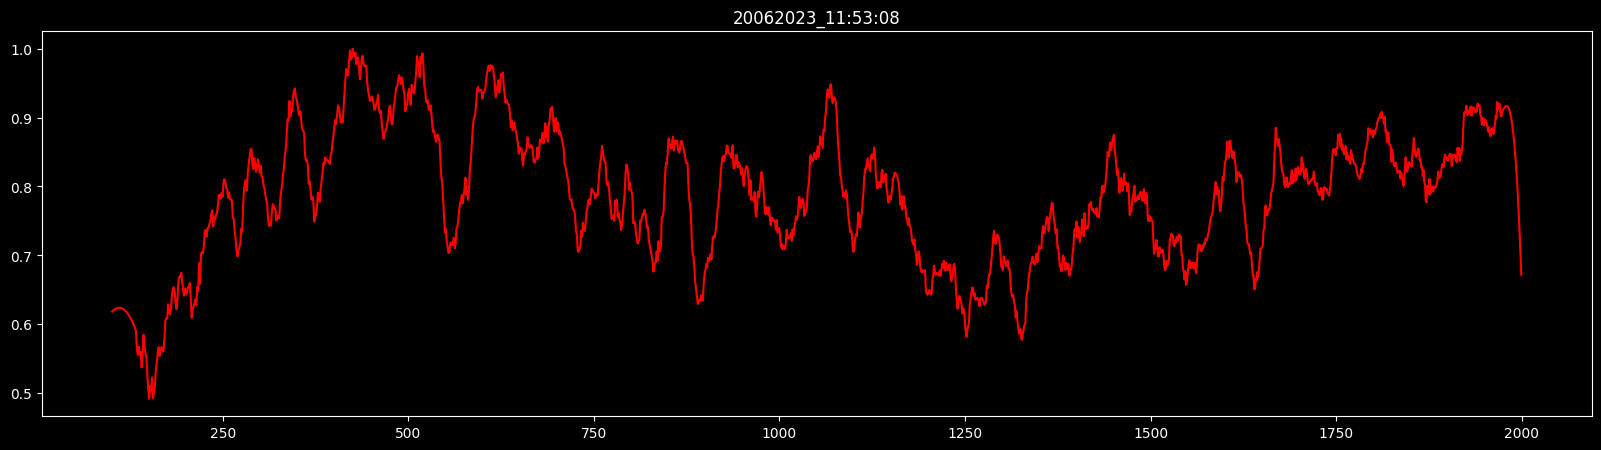

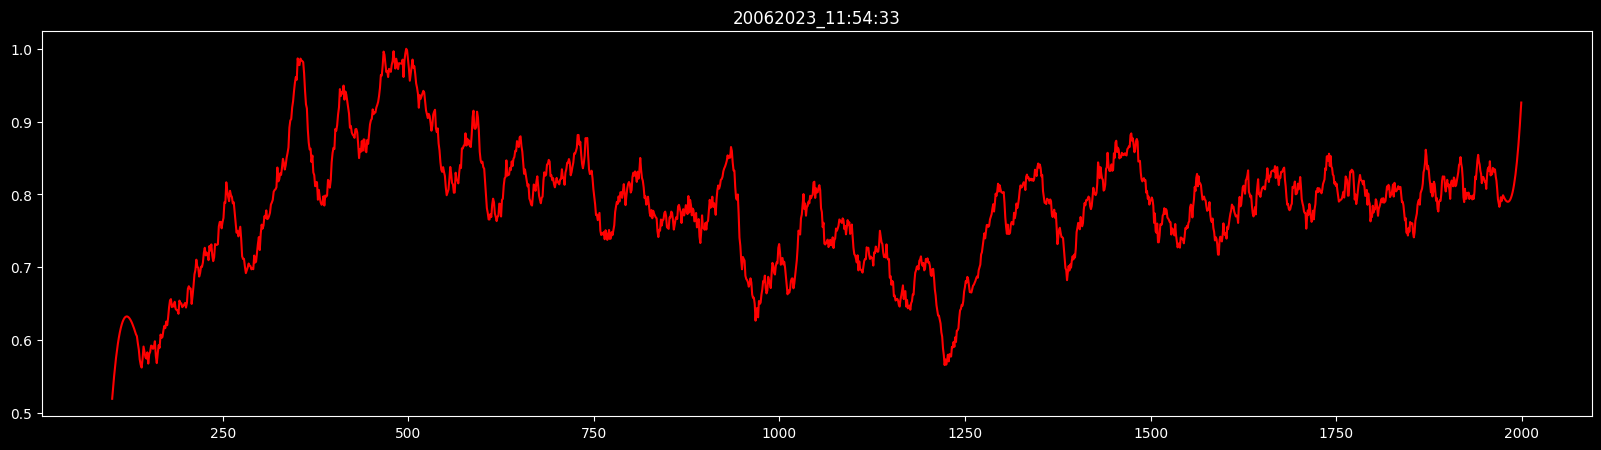

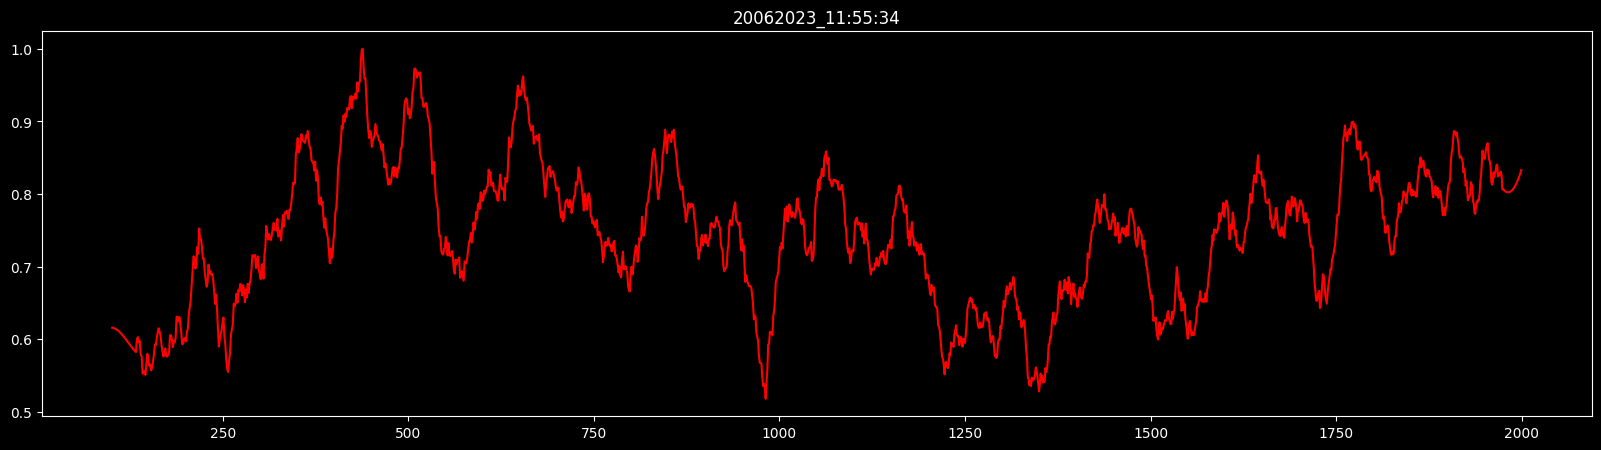

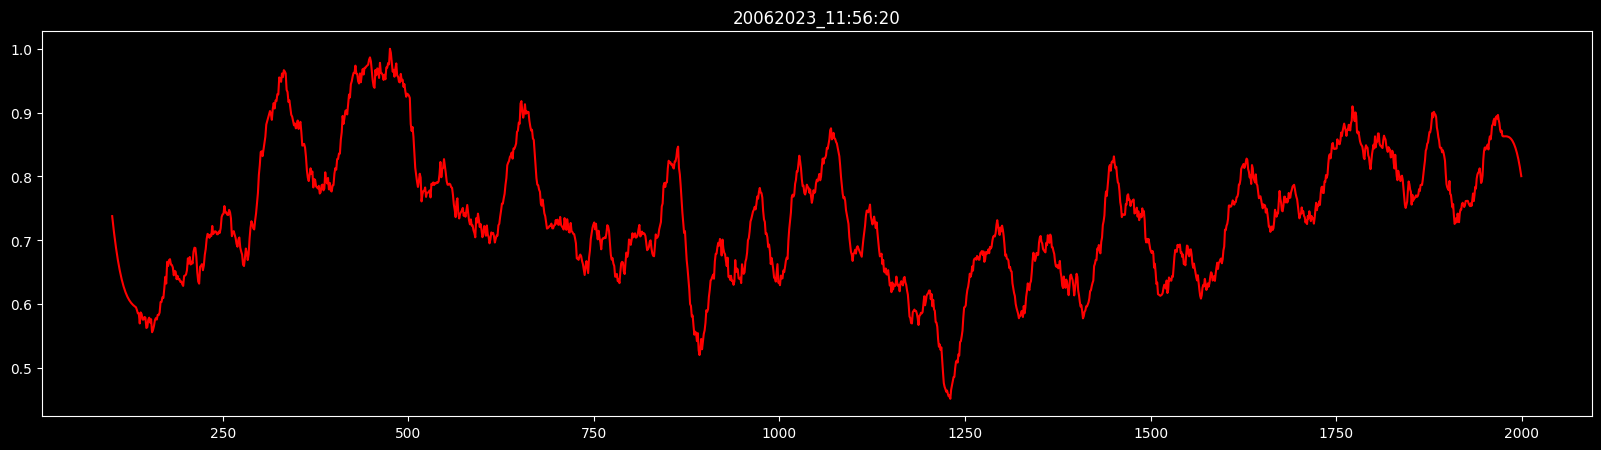

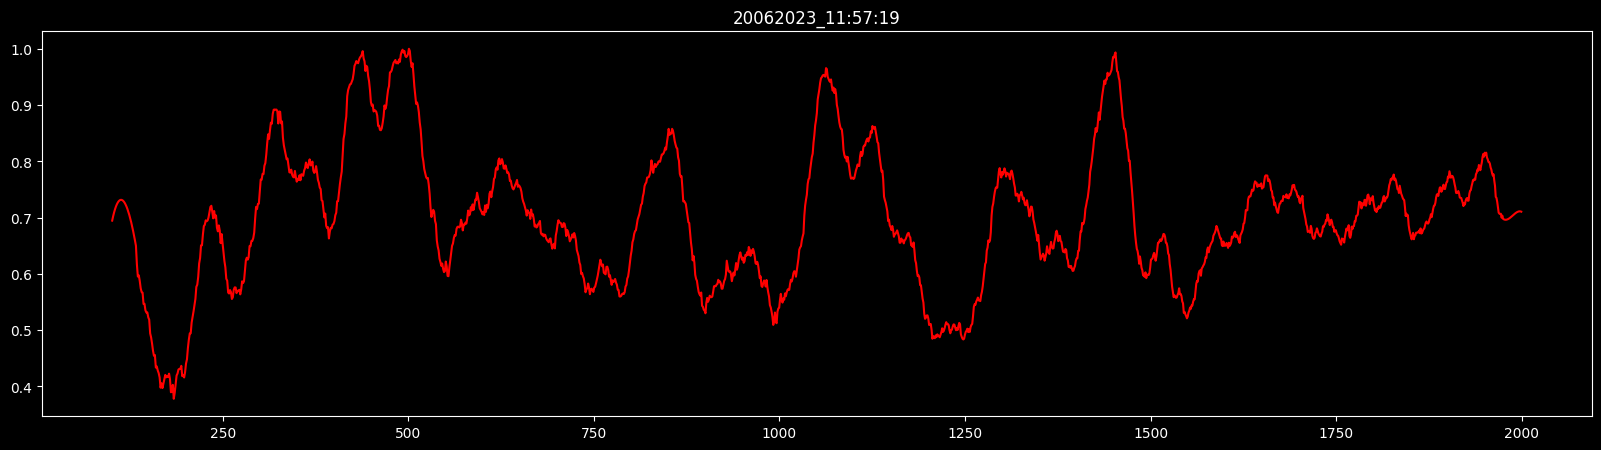

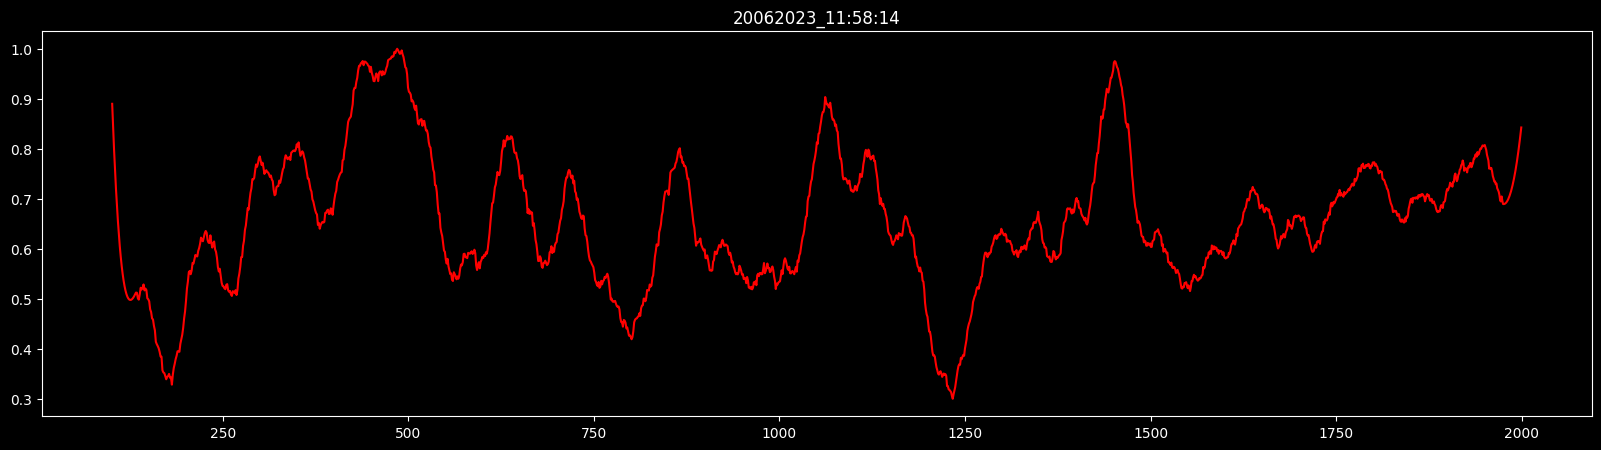

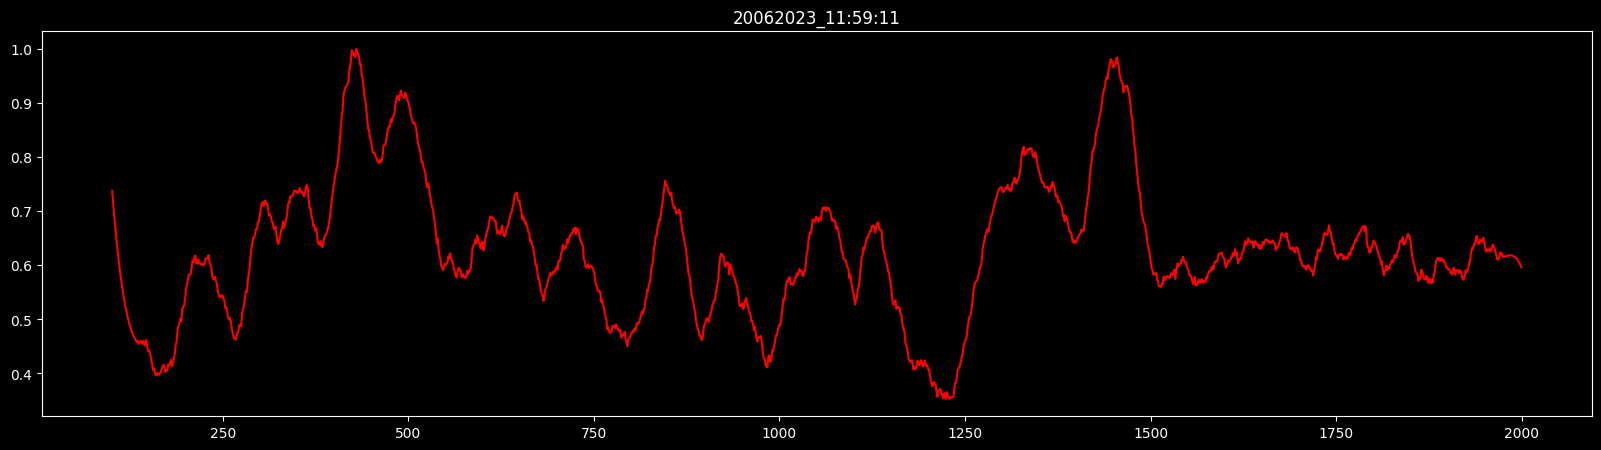

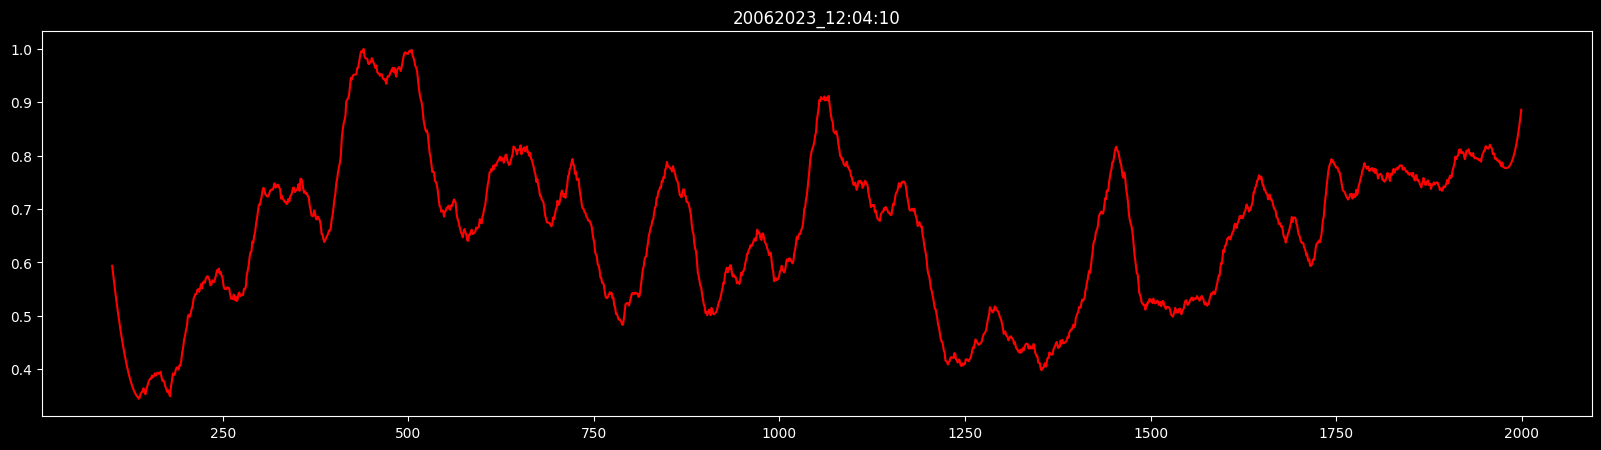

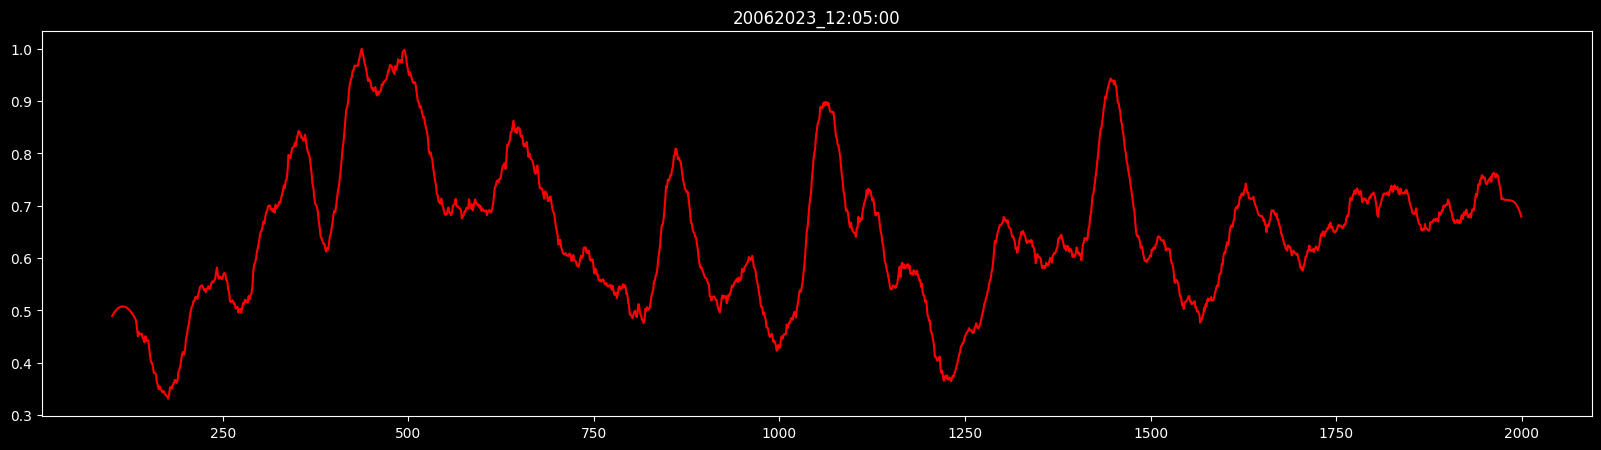

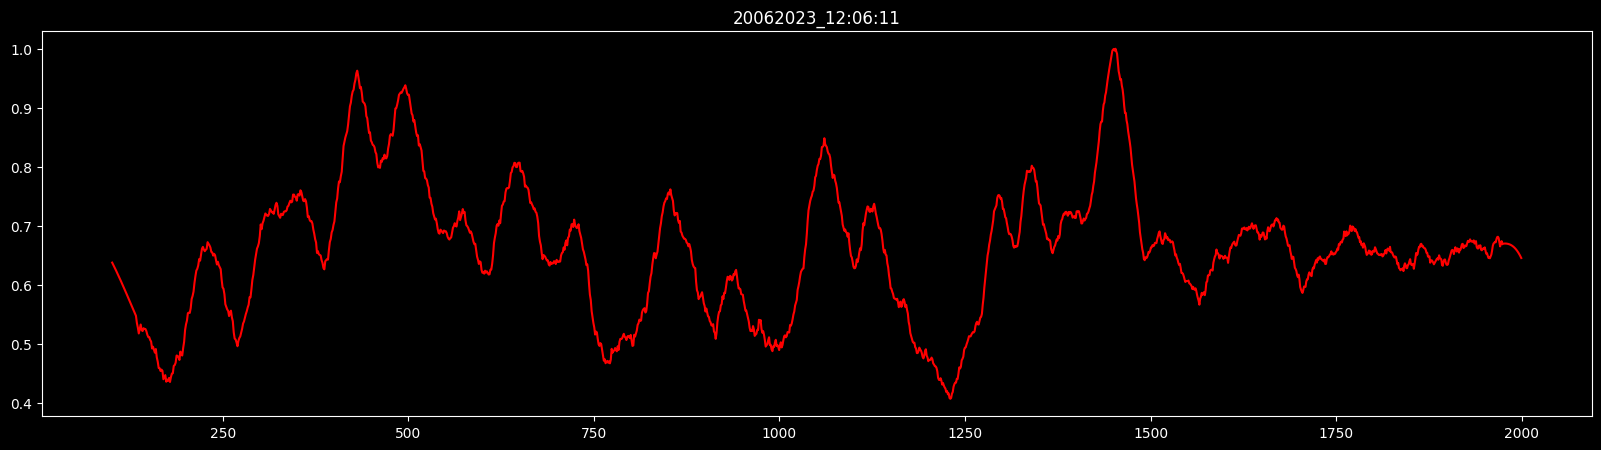

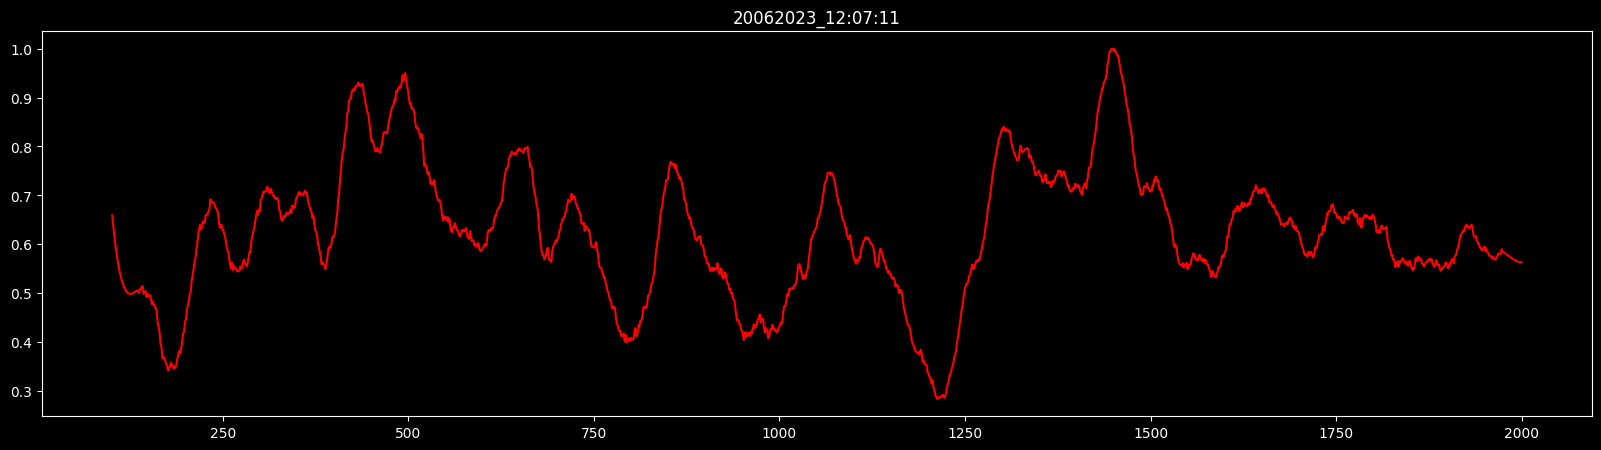

In [18]:
for ramob in ramanspecs.values():
    plot_savinormalized(ramob)

In [19]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt


In [43]:
test.props['x_proposed']

array([ 101.054,  102.338,  103.621, ..., 1997.41 , 1998.39 , 1999.37 ])

In [21]:
data = []

for v in ramanspecs.values():
    data.append(v.props['y_proposed'])

In [27]:
for e in data:
    print(e.shape)

(1686,)
(1689,)
(1692,)
(1690,)
(1690,)
(1693,)
(1691,)
(1685,)
(1691,)
(1686,)
(1687,)
(1690,)
(1686,)
(1690,)


In [32]:
# Find the minimum length of the observations
min_length = min(len(observation) for observation in data)

# Reshape the observations
reshaped_data = [observation[:min_length] for observation in data]


In [34]:
for e in reshaped_data:
    print(type(e))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
# Stack the observations vertically to form a matrix
matrix = np.vstack(reshaped_data)

# Perform SVD
U, S, Vt = svd(matrix)


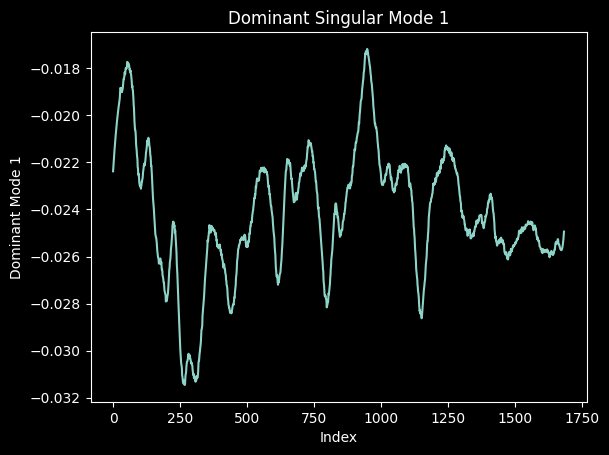

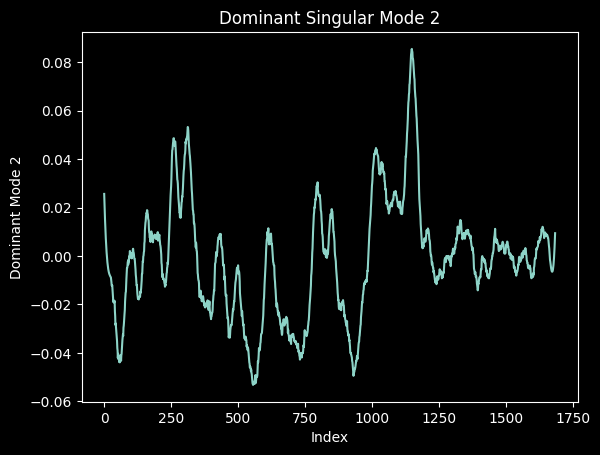

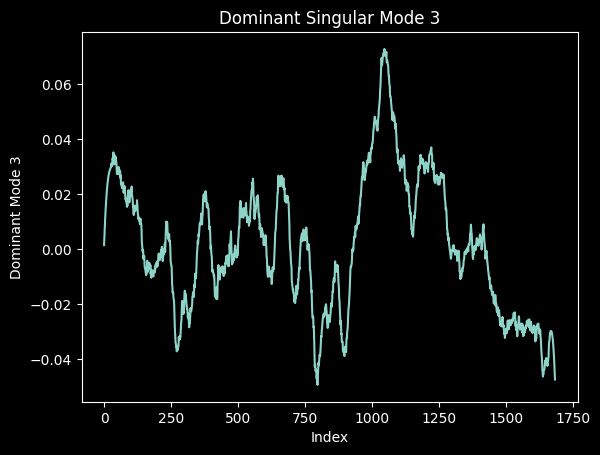

In [37]:
num_modes = 3  # Number of dominant modes to plot

# Plot the dominant singular modes
for i in range(num_modes):
    plt.figure()
    plt.plot(Vt[i, :])  # Right singular vectors contain the modes
    plt.xlabel('Index')
    plt.ylabel(f'Dominant Mode {i+1}')
    plt.title(f'Dominant Singular Mode {i+1}')
    plt.show()


In [44]:
w = test.props['x_proposed']

In [45]:
# Assuming `w` is an array of wavelengths corresponding to the data points

# Choose the index of the dominant singular mode that represents the signal
signal_mode_index = 0

# Extract the dominant singular mode
signal_mode = Vt[signal_mode_index, :]

# Calculate the noise mode as the sum of all other singular modes
noise_mode = np.sum(Vt[signal_mode_index+1:, :], axis=0)

# Calculate the reconstructed signal by multiplying the singular values and singular vectors
reconstructed_signal = U[:, signal_mode_index] * S[signal_mode_index] * signal_mode

# Calculate the reconstructed noise by multiplying the singular values and singular vectors of noise modes
reconstructed_noise = np.sum(U[:, signal_mode_index+1:] * S[signal_mode_index+1:, np.newaxis] * Vt[signal_mode_index+1:, :], axis=1)

# Calculate the signal-to-noise ratio (SNR) for each wavelength
snr = reconstructed_signal / reconstructed_noise

# Plot the SNR
plt.plot(w, snr)
plt.xlabel('Wavelength')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('SNR vs. Wavelength')
plt.show()


ValueError: operands could not be broadcast together with shapes (14,) (1685,) 

In [23]:
import os
import cv2

def create_video_from_images(keyword,image_folder, output_path, frame_duration):
    # Get a list of all image files in the specified folder and its subfolders
    image_files = []
    for root, dirs, files in os.walk(image_folder):
        if keyword in root:
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_files.append(os.path.join(root, file))

    # Sort the image files alphabetically
    image_files.sort()

    # Initialize the video writer
    frame_width, frame_height = 0, 0
    video_writer = None

    # Iterate over each image file
    for i in range(0,10):
        for image_file in image_files:
            # Read the image
            image = cv2.imread(image_file)

            # Get the frame size from the first image
            if frame_width == 0 and frame_height == 0:
                frame_height, frame_width, _ = image.shape

            # Create the video writer on the first iteration
            if video_writer is None:
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                video_writer = cv2.VideoWriter(output_path, fourcc, 1000 // frame_duration, (frame_width, frame_height))

            # Write the image to the video for the specified duration
            for _ in range(frame_duration):
                video_writer.write(image)

    # Release the video writer
    if video_writer is not None:
        video_writer.release()

    print(f"Video created successfully at: {output_path}")


# Specify the folder path containing the images
image_folder_path = './vid50/p1/'

# Specify the output video file path
output_video_path = 'm50p1video.mp4'

# Specify the duration of each frame in milliseconds
frame_duration = 15  # 100 milliseconds = 0.1 seconds

# Call the function to create the video
create_video_from_images('.',image_folder_path, output_video_path, frame_duration)

Video created successfully at: m50p1video.mp4


In [19]:
import os
import cv2

def create_video_from_images(keyword, image_folder, output_path, frame_duration):
    # Get a list of all image files in the specified folder and its subfolders
    image_files = []
    for root, dirs, files in os.walk(image_folder):
        if keyword in root:
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_files.append(os.path.join(root, file))

    # Sort the image files alphabetically
    image_files.sort()

    # Initialize the video writer
    frame_width, frame_height = 0, 0
    video_writer = None

    # Create the video writer on the first iteration
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_path, fourcc, 1000 // frame_duration, (frame_width, frame_height))

    # Iterate over the desired number of repetitions
    for _ in range(5):
        # Iterate over each image file
        for image_file in image_files:
            # Read the image
            image = cv2.imread(image_file)

            # Get the frame size from the first image
            if frame_width == 0 and frame_height == 0:
                frame_height, frame_width, _ = image.shape

            # Write the image to the video for the specified duration
            for _ in range(frame_duration):
                video_writer.write(image)

    # Release the video writer
    if video_writer is not None:
        video_writer.release()

    print(f"Video created successfully at: {output_path}")


# Specify the folder path containing the images
image_folder_path = './vid50/'

# Specify the output video file path
output_video_path = './m250video.mp4'

# Specify the duration of each frame in milliseconds
frame_duration = 30  # 100 milliseconds = 0.1 seconds

# Call the function to create the video
create_video_from_images('.', image_folder_path, output_video_path, frame_duration)


Video created successfully at: ./m250video.mp4
